# MATHCOUNTS Round Type Statistical Analysis

Breaking down some of the statistics behind the West Frederick Middle School MATHCOUNTS Program. In this notebook, we look at discrepancies between the warm-up rounds, target rounds, and sprint rounds over time.

## The Program

The actual code involved in showing the statistics.

### Importing Directories

Used to help navigate the files and parse the .csv, as well as plot the results.

In [1]:
import os
import csv
import matplotlib.pyplot as plt
import matplotlib

### Importing the Data

This approach first parses all of the dates which are dates of warmup rounds. Then, the program adds the scores of each student to the individual corresponding rounds array, and then increments the total number of students that took each round.

In [2]:
def get_scores(round_type):
    
    # Containers for data
    columns = []
    scores = [0, 0, 0, 0, 0]
    students = [0, 0, 0, 0, 0]
    dates = []
    
    # Opening up the CSV file
    with open('data/MATHCOUNTS Spreadsheet.csv') as csv_file:

        # Parsing through CSV
        csv_reader = csv.reader(csv_file, delimiter=',')

        # To loop through the lines
        line_count = 0

        # Counters for dif
        for row in csv_reader:

            # Checks the heads of the columns
            if line_count == 0:

                # Parsing through the Different Columns
                for i in range(0, len(row) - 1):

                    # Getting the name of each column
                    column = row[i]

                    # Checking if entry in .csv is null
                    if (row[i] != ''):

                        # Checking if entry is actually a warm-up
                        if (column[len(column) - 1] == round_type):

                            # Appending the date to the list of dates
                            dates.append(column[0:len(column) - 1])

                            # Appending the corresponding column to the list of colunmns
                            columns.append(i)

                # Increment lines
                line_count += 1

            else:

                # Used to parse through the scores and students arrays
                counter = 0

                # Parsing through all of the columns with warm-up dates
                for col in columns:

                    # If the entry of the column is not null
                    if (row[col] != ''):

                        # Add sums and increment each number to each specific array
                        scores[counter] = scores[counter] + int(row[col])
                        students[counter] = students[counter] + 1

                    # Increment counter
                    counter = counter + 1

                # Increment line
                line_count += 1
                
    return columns, scores, students, dates

### Calculating the Averages

Calculates the average for each round type by taking the total scores and dividing by the total number of students who actually took the warm-up.

In [3]:
# Used to hold the averages
def get_averages(scores, students, point_factor):
    
    # Array to store averages
    averages = []

    # Parsing through the arrays of all the scores
    for i in range(0, len(scores)):
        if (students[i] != 0):
            average = scores[i] * point_factor / students[i]
            averages.append(average)
    
    # Return array of averages
    return averages

### Graphing the Improvement of a Round Type over Time

Graphing the cumulative average over time.

In [4]:
def graph_averages(averages, round_type):
    
    # Plot the numbers
    plt.plot(averages)
    
    # Set labels for the axes and the title
    plt.title('Performance on ' + round_type)
    plt.xlabel('Number of ' + round_type + ' rounds')
    plt.ylabel('Average Score/Student')
    
    # Showing the Plot
    plt.show()

## The Results

Showing the actual data.

### Type 1: Warm-Up

$3$ questions, $8$ total minutes.

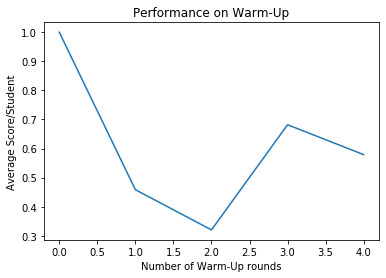

In [5]:
warmup_columns, warmup_scores, warmup_students, warmup_dates = get_scores("W")
warmup_averages = get_averages(warmup_scores, warmup_students, 1)
graph_averages(warmup_averages, "Warm-Up")

### Type 2: Target

$8$ questions total, $6$ total minutes for each set of $2$ questions.

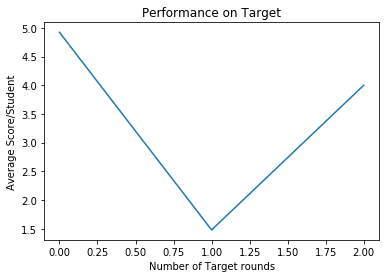

In [6]:
target_columns, target_scores, target_students, target_dates = get_scores("T")
target_averages = get_averages(target_scores, target_students, 2)
graph_averages(target_averages, "Target")

### Type 3: Sprint

$30$ questions total, $40$ total minutes.

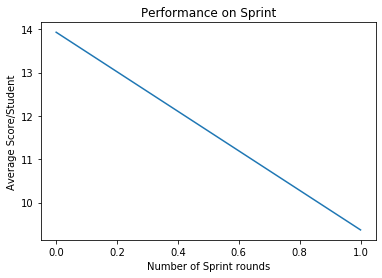

In [7]:
target_columns, target_scores, target_students, target_dates = get_scores("S")
target_averages = get_averages(target_scores, target_students, 1)
graph_averages(target_averages, "Sprint")